In [568]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [569]:
BTC_Ticker = yf.Ticker("BTC-USD")
df = BTC_Ticker.history(period="max")

In [570]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-23,38285.281250,39122.394531,37201.816406,37296.570312,21849073843,0,0
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,46383802093,0,0
2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,26545599159,0,0
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,17467554129,0,0
2022-02-27,39078.054688,39769.511719,37829.585938,37829.585938,19942158336,0,0


In [571]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2721.0,2721.0
mean,11390.906697,11696.111340,11052.642332,11402.920602,1.473370e+10,0.0,0.0
std,16149.940449,16581.705921,15650.269463,16152.386547,2.000072e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,607.005005,609.734985,604.606995,606.973022,8.026580e+07,0.0,0.0
50%,6330.770020,6446.259766,6236.470215,6329.950195,5.127130e+09,0.0,0.0
75%,10535.492188,10798.729492,10234.576172,10549.329102,2.460973e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2721 entries, 2014-09-17 to 2022-02-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2721 non-null   float64
 1   High          2721 non-null   float64
 2   Low           2721 non-null   float64
 3   Close         2721 non-null   float64
 4   Volume        2721 non-null   int64  
 5   Dividends     2721 non-null   int64  
 6   Stock Splits  2721 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 170.1 KB


In [573]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27'],
              dtype='datetime64[ns]', name='Date', length=2721, freq=None)

In [574]:
df_close = df['Close']
df_close = df_close.to_frame()

In [575]:
df_close.columns

Index(['Close'], dtype='object')

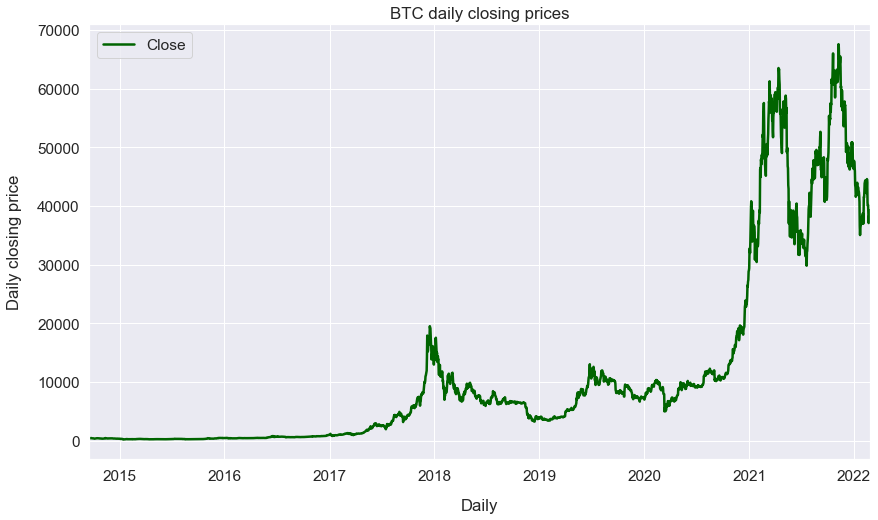

In [576]:
sns.set(font_scale=1.4)
f = df_close['Close'].plot(figsize=(14,8), linewidth=2.5, color='darkgreen', legend=True)
f.set_xlabel('Daily', labelpad=15)
f.set_ylabel('Daily closing price', labelpad=15)
f.set_title('BTC daily closing prices');

In [577]:
df_close.ta.ema(close='Close', length=10, append=True)
df_close

,Close,EMA_10
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2022-02-23,37296.570312,39490.557926
2022-02-24,38332.609375,39280.021826
2022-02-25,39214.218750,39268.057630


In [578]:
df_close = df_close.iloc[10:]
df_close

,Close,EMA_10
Date,,
2014-09-27,399.519989,413.121615
2014-09-28,377.181000,406.586958
2014-09-29,375.467010,400.928785
2014-09-30,386.944000,398.386097
2014-10-01,383.614990,395.700441
...,...,...
2022-02-23,37296.570312,39490.557926
2022-02-24,38332.609375,39280.021826
2022-02-25,39214.218750,39268.057630


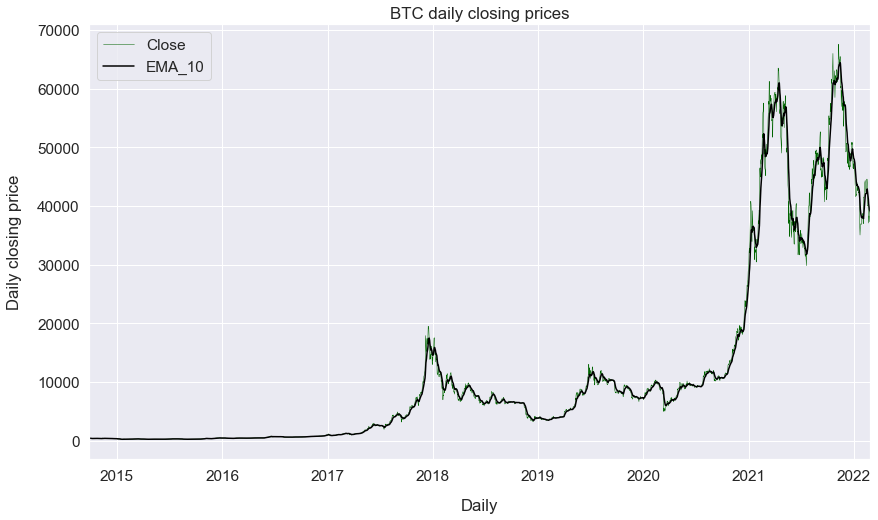

In [579]:
sns.set(font_scale=1.4)
f = df_close['Close'].plot(figsize=(14,8), linewidth=0.5, color='darkgreen', legend=True)
f = df_close['EMA_10'].plot(figsize=(14,8), linewidth=1.5, color='black',  legend=True)
f.set_xlabel('Daily', labelpad=15)
f.set_ylabel('Daily closing price', labelpad=15)
f.set_title('BTC daily closing prices');

In [580]:
X_train, X_test, y_train, y_test = train_test_split(df_close[['EMA_10']], df_close[['Close']], test_size=.2)

In [581]:
print(X_test.describe())

             EMA_10
count    543.000000
mean   12380.788101
std    17481.874750
min      225.830716
25%      589.027403
50%     5320.120696
75%    10763.000368
max    64111.801785


In [582]:
print(X_train.describe())

             EMA_10
count   2168.000000
mean   11128.630052
std    15713.498743
min      223.191496
25%      610.606822
50%     6462.694891
75%    10445.972317
max    64411.387714


In [583]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [584]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[1.00052938]]
Mean Absolute Error: 576.8652933359422
Coefficient of Determination: 0.9951471248734619


In [585]:
df_train = X_train.join(y_train)
df_train

,EMA_10,Close
Date,,
2018-12-01,4268.926843,4214.671875
2015-05-25,237.495429,237.110001
2019-03-04,3844.755856,3761.557129
2017-09-23,3802.267788,3792.399902
2017-07-20,2368.566505,2817.600098
...,...,...
2019-11-01,8989.283896,9261.104492
2015-01-05,297.779471,274.473999
2016-11-05,699.824562,703.418030


In [586]:
X_test

,EMA_10
Date,
2015-09-27,232.652384
2021-08-11,43320.219589
2018-03-16,9074.068342
2014-11-20,376.528981
2018-03-18,8747.308485
...,...
2019-07-18,10720.437375
2021-04-10,58242.572881
2018-11-01,6406.156826


In [587]:
y_pred.shape

(543, 1)

In [588]:
X_test.shape

(543, 1)

In [589]:
#reshape X_test to np.array
X_test_input = np.asarray(X_test)

In [590]:
# first method: get regression values with scipy stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test_input[:,0], y_pred[:,0])

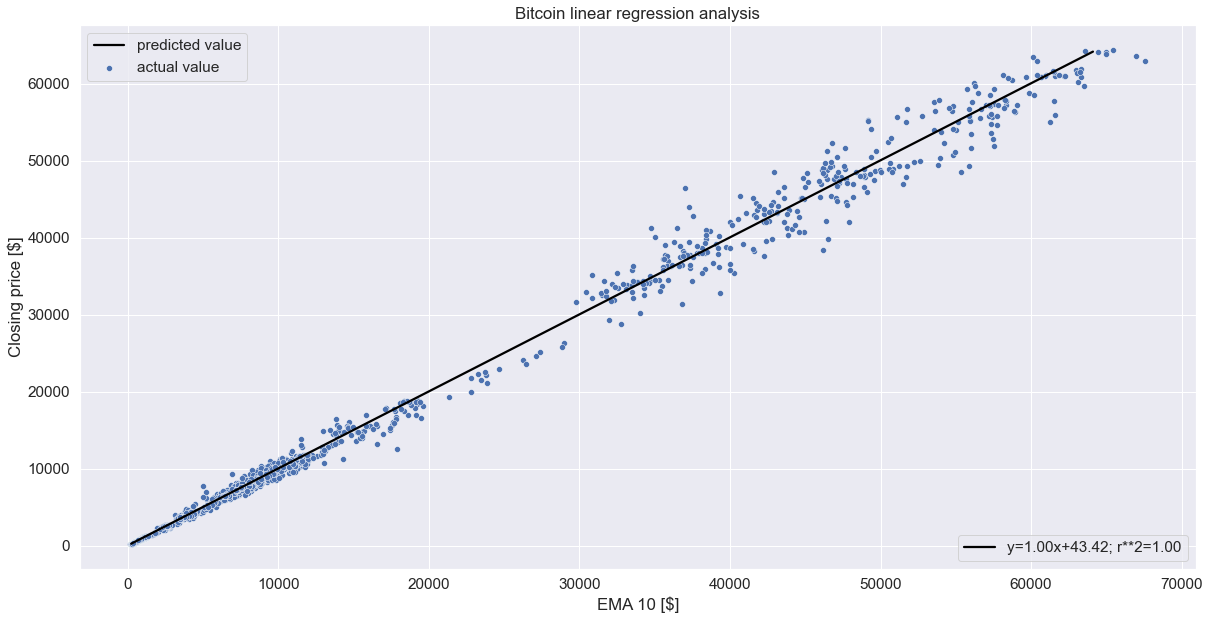

In [591]:
sns.set(font_scale=1.4, rc={'figure.figsize':(20,10)})
ax = sns.scatterplot(data = df_train, x = "Close", y = "EMA_10")

ax = sns.regplot(x=X_test_input, y=y_pred, color='black',scatter=False,
                label = "y={:.2f}x+{:.2f}; r**2={:.2f}".format(slope,intercept, r2_score(y_test, y_pred)))
     
                

ax.set_xlabel('EMA 10 [$]')
ax.set_ylabel('Closing price [$]')
ax.set_title('Bitcoin linear regression analysis')

leg1 = ax.legend(labels=['predicted value', 'actual value'], loc='upper left')
leg2 = ax.legend(loc='lower right')
ax.add_artist(leg1)


In [592]:
df_pred = y_test

In [593]:
df_pred['Close_pred'] = y_pred.tolist()
df_pred['Close_pred'] = df_pred['Close_pred'].str[0]
df_pred

,Close,Close_pred
Date,,
2015-09-27,232.757004,276.195313
2021-08-11,45593.636719,43386.572326
2018-03-16,8338.349609,9122.291763
2014-11-20,357.839996,420.148076
2018-03-18,8223.679688,8795.358925
...,...,...
2019-07-18,10666.482422,10769.532355
2021-04-10,59793.234375,58316.825253
2018-11-01,6377.779785,6452.967901


In [594]:
df_pred1 = pd.merge(df_pred, df[['Open']], left_index=True, right_index=True)
df_pred1['Trigger'] = df_pred1['Close_pred'] > df_pred1['Open']
df_pred1['Outcome'] = (df_pred1['Close'] - df_pred1['Open']).where(df_pred1['Trigger'] == True)
df_pred1['Outcome'].count()
np.sum((df_pred1['Outcome'] > 0).values.ravel())

206

In [595]:
df_pred1['Outcome'][df_pred1['Outcome'] < 0].sum()

-30403.465133666992

In [596]:
df_pred1['Outcome'][df_pred1['Outcome'] > 0].sum()

54229.08239746094

In [597]:
df_pred2 = df_pred1.dropna()
df_pred2 = df_pred2.sort_values('Date')
df_pred2['P&L'] = df_pred2['Outcome'].cumsum(axis=0)
df_pred2

,Close,Close_pred,Open,Trigger,Outcome,P&L
Date,,,,,,
2014-09-27,399.519989,456.760081,403.556000,True,-4.036011,-4.036011
2014-09-29,375.467010,444.560797,376.928009,True,-1.460999,-5.497009
2014-10-09,365.026001,400.116260,352.747986,True,12.278015,6.781006
2014-10-12,378.549011,405.603338,362.605988,True,15.943024,22.724030
2014-10-18,391.441986,425.035848,383.976013,True,7.465973,30.190002
...,...,...,...,...,...,...
2022-01-25,36954.003906,38643.334765,36654.804688,True,299.199219,22779.461014
2022-01-27,37138.234375,38124.049005,36841.878906,True,296.355469,23075.816483
2022-02-21,37075.281250,40418.911800,38423.210938,True,-1347.929688,21727.886795


Text(0.5, 1.0, 'P&L of Bitcoin price prediction')

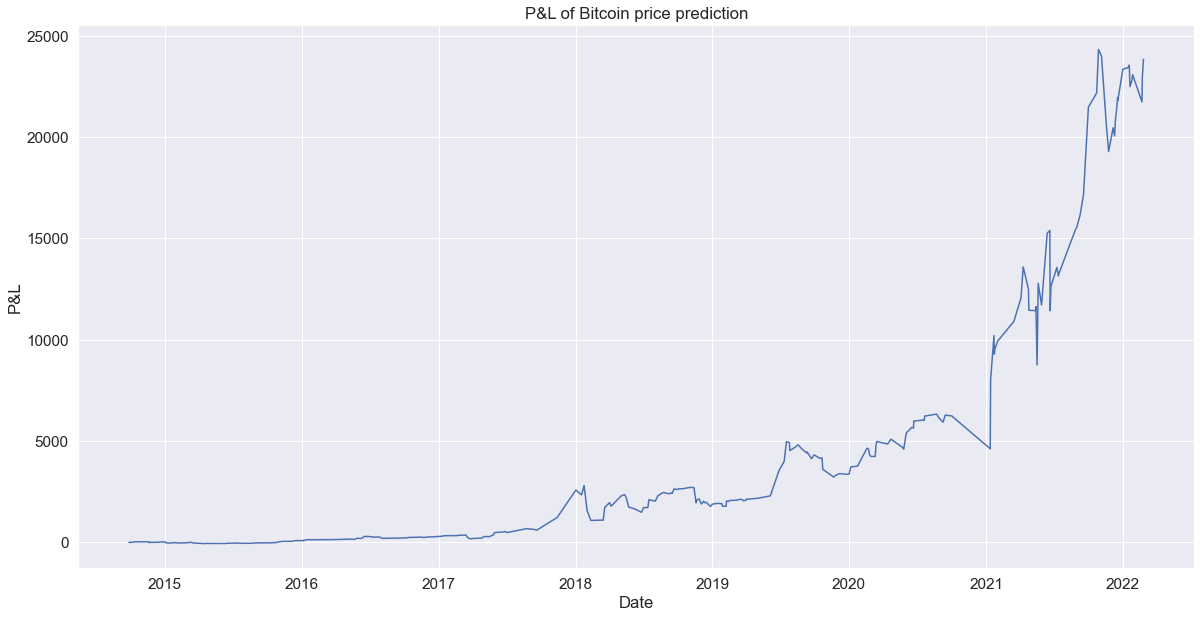

In [598]:
sns.set(font_scale=1.4, rc={'figure.figsize':(20,10)})
ax = sns.lineplot(data = df_pred2, x = "Date", y = "P&L")
ax.set_title('P&L of Bitcoin price prediction')

The performance of the closing price prediction of linear regression based on the real closing price and EMA 10 is mostly positive. However, this trading method would incur significant drawdowns. Other TA-Indicators and ML-algorithms would need to be tested for better performance. 